Topic 5: Preprocessing

<a id='ref605'></a>
# Task 5

Part of assignments for the Machine Learning and Statistics modulel of the Higher Diploma in Science in Data Analytics course at ATU 2023

Winter 23/24

Author: Jarlath Scarry

### Preprocessing

>Perform Principal Component Analysis on the iris data set reducing the number of dimensions to two. Explain the purpose
of the analysis and your results.

### Content

The notebook task involves assess the normality of the dataset as a whole and specifically the 'setosa' class using Shapiro-Wilk test. Following this standard scaling is applied to normalize the data features. Finally Principal Component Analysis (PCA) is carried out to reduce the dimensions to two. This allows better visualisation of the variance explained by these variables.

In [1]:
#imports
import pandas as pd                   # Data frames.
import sklearn as sk                  # Machine Learning.
import sklearn.neighbors as ne        # Nearest neighbors.
import sklearn.preprocessing as pre   # Preprocessing.
import sklearn.decomposition as dec   # Decomposition.
import scipy.stats as ss              # Statistical test.
import matplotlib.pyplot as plt       # Plots.
import seaborn as sns                 # Statistical plots.
import warnings
warnings.filterwarnings('error', category=DeprecationWarning)

In [3]:
# Load the Iris dataset
df = pd.read_csv(r"..\data\iris.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
# Drop any rows with NA/Nan.
df = df.dropna()

# Show.
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Separate out the target variable. In this case we are looking to predict class, so we seperate it out as y. 

The feature data we are using to predict the class is seperated to the variable X. 

In [5]:
# Separate out the target variable. In this case we are looking to predict class, so we seperate it out as y. 
# The feature data we are using to predict the class is seperated to the variable X. 
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['class']

## Tests for Normality

The approaches can be divided into two main themes: relying on statistical tests or visual inspection. Statistical tests have the advantage of making an objective judgement of normality, but are disadvantaged by sometimes not being sensitive enough at low sample sizes or overly sensitive to large sample sizes. As such, some statisticians prefer to use their experience to make a subjective judgement about the data from plots/graphs. 

#### Shapiro test

The Shapiro (Shapiro-Wilk) test is a statistical test used to test if a sample data is normally distributed or not. 
The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed. 

 [[502]](#ref502) (wikipedia, Shapiro–Wilk test, Dec 2023)

If the Sig. value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution.

 [[504]](#ref504) (statistics.laerd.com, Testing for Normality using SPSS Statistics, Dec 2023) retreived from: https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php


NameError: name 'classes' is not defined

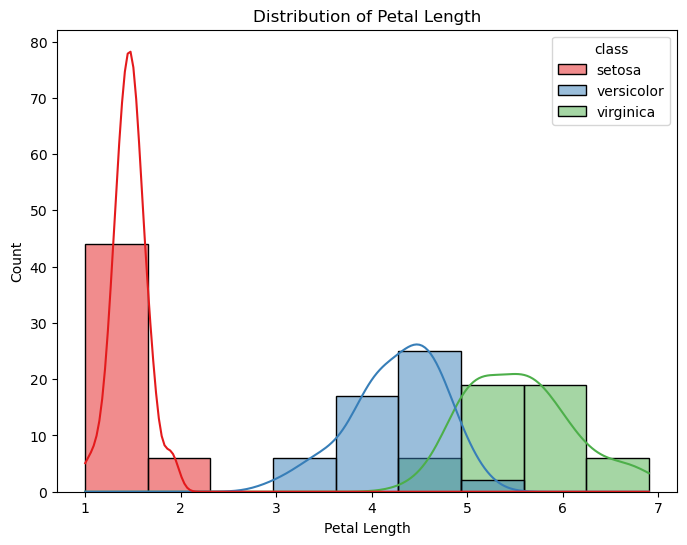

In [6]:
#Lets look at the distribution of the petal_length. Setosa is seperate

# Histogram.
# Create a histogram for petal length separated by class
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='petal_length', hue='class', kde=True, palette='Set1')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Count')
#plt.legend(title='Class')
plt.legend(classes, title='Class')
plt.show()

#### Shapiro test result

This result indicates that petal length is far from normally distributed across all classes

In [7]:
ss.shapiro(df['petal_length'])

ShapiroResult(statistic=0.8764244318008423, pvalue=7.545183366985952e-10)

<Axes: >

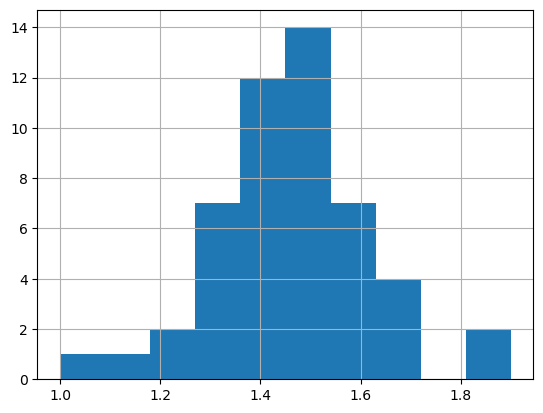

In [8]:
# Separate out gentoos. Lets look at distribution of setosa in isolation
df_seto = df[df['class'] == 'setosa']

# Histogram.
df_seto['petal_length'].hist()


#### Shapiro test result for just setosa

The p-value indicates the strength of evidence that the data is normally distributed. With a pvalue >0.05, we can say the 'petal_length' data for 'setosa' may not significantly deviate from a normal distribution. So it looks like within the setosa class, petal_length is likley to be normally distributed. The data for all classes together combined however is not likley to be normally distributed.

In [9]:
ss.shapiro(df_seto['petal_length'])

ShapiroResult(statistic=0.9549456834793091, pvalue=0.054648224264383316)

## Scaling Data

Scaling data for machine learning involves transforming the variable features to a similar scale so they are comparable. It reduces unwanted or disproportionate impact on analyses or machine learning.

Standardize features by removing the mean and scaling to unit variance. We will use Standardscaler to scale the data.

 [[503]](#ref503) (scikit-learn.org, StandardScaler, Dec 2023)

In [10]:
#import the df again
# Load the Iris dataset
df2 = pd.read_csv(r"..\data\iris.csv")
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df2 = df2.dropna()

In [12]:
# Separate out the target variable. In this case we are looking to predict class, so we seperate it out as y. 
# The feature data we are using to predict the class is seperated to the variable X. 
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['class']

In [13]:
# Create a standard scaler.
scaler = pre.StandardScaler()

# Show.
scaler

StandardScaler()

In [14]:
# Fit the data to the scaler.
scaler.fit(X)

StandardScaler()

In [15]:
# Show the means and variances.
scaler.mean_, scaler.var_

(array([5.84333333, 3.054     , 3.75866667, 1.19866667]),
 array([0.68112222, 0.18675067, 3.09242489, 0.57853156]))

In [16]:
# Verify the above. Does that look right? Yes it matches.
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
# Transformed X array.
X_transformed = scaler.transform(X)

#the earlier fitted scaler is used to transform the 
#original dataset X into a scaled form (X_transformed) for further analysis. 
#It keeps the same scaling learned from the original data.

# Show.
X_transformed

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [18]:
# Means.
X_transformed.mean(axis=0)

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [19]:
# Means.
X_transformed.std(axis=0)

array([1., 1., 1., 1.])

In [20]:
# Differences squared between first and last row.
(X_transformed[0] - X_transformed[-1])**2

array([0.93962578, 1.33868331, 4.42694665, 4.42499631])

In [21]:
# Original column names.
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [22]:
# Re-create data frame.
df_X_trans = pd.DataFrame(X_transformed, columns=X.columns)

# Show.
df_X_trans

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


## Dimensions

***

In [23]:
# Look at the data again.
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


C:\Users\JS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


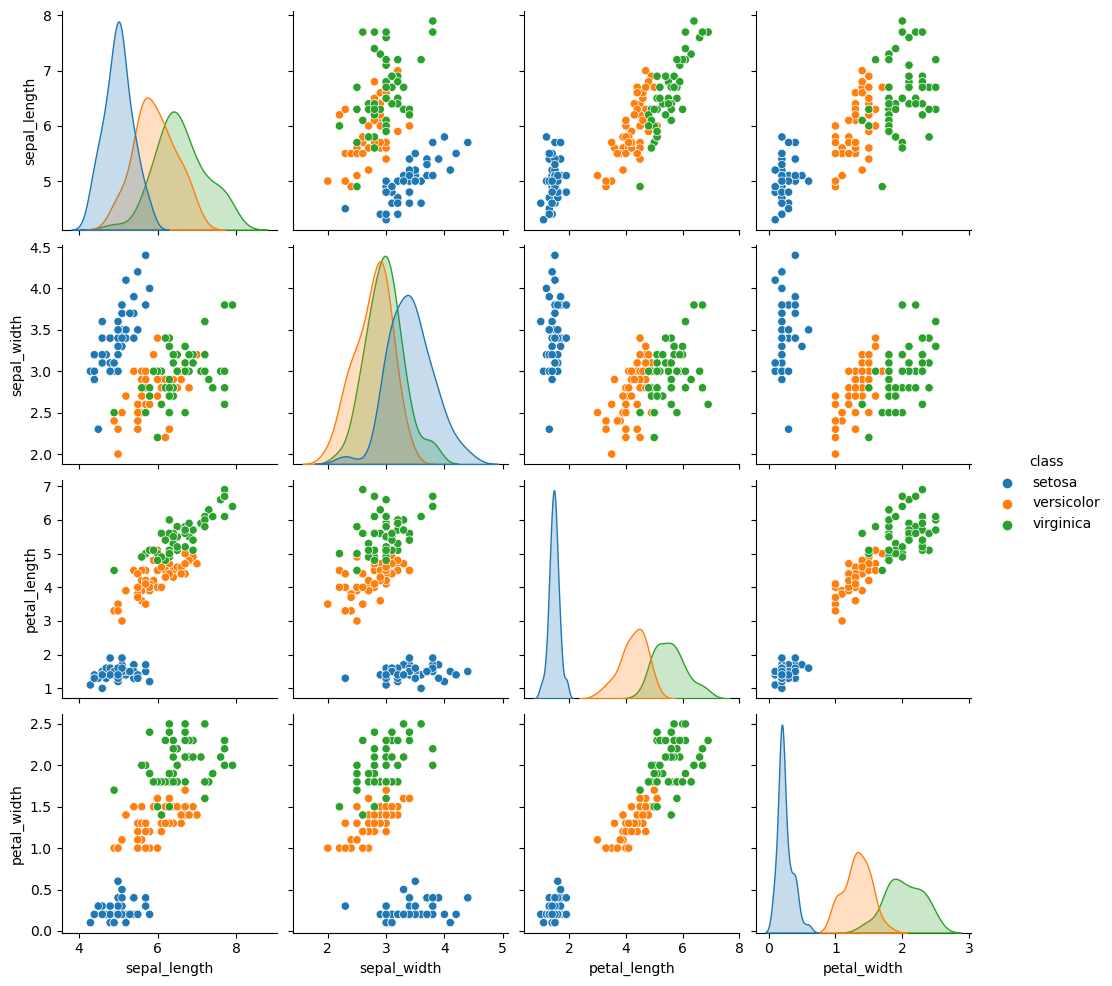

In [24]:
# Scatter plots and histograms.
sns.pairplot(df, hue='class');

Looking at the pairplots, we can see that setosa are lierarly seperable in a number of pairplots, but there is no way to seperate all classes with a pair of variables.

#### Principal component analysis (PCA) 

There is no good visualisation for all the variables together. As we have seen, the pair plot is probably the best quick visualisation of all the variables in the iris dataset together. We can see at a glance the spread of points and then easily focus on one pair for a closer look, but is there a better way to combine the data from all the variables? 

Principal component analysis attempts to do this. It is an attempt to take the key points (or essence) of all the variables and combint them into two bariables that can be easily plotted.

PCA is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. 

 [[501]](#ref501) (wikipedia.org, Principal component analysis Dec 2023)

In [27]:
# Load the Iris dataset
df = pd.read_csv(r"..\data\iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
#crete new PCA instance.

pca = dec.PCA(n_components=2)

In [29]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
#fit the data to pca
pca.fit(X) 


PCA(n_components=2)

In [31]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [32]:
X_pca = pca.transform(X)

#### Explained variance ratios obtained from performing Principal Component Analysis (PCA)

In this case, the `array([0.92461621, 0.05301557])` represents the proportion of variance explained by each principal component. Running the PCA above resulted in two principal components. The variance ratios for these components are approximately 92.46% for the first and 5.30% for the second. This tells us that most of the variance in the orivinal variables is retained by the first principal component. The second retains very little in comparison.

In [33]:
X_pca

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

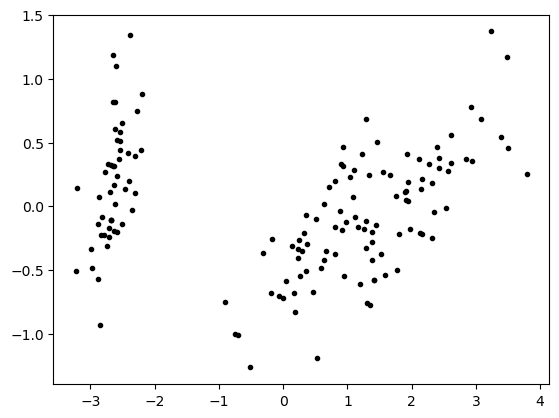

In [34]:
# Create an empty plot.
fig, ax = plt.subplots()

# Plot scatter plot.
ax.plot(X_pca[:, 0], X_pca[:, 1], 'k.');

In [35]:
# Original classifications.
df_pca = pd.DataFrame(df[['class']])

# Show.
df_pca

,class
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [36]:
# Incorporate our PCA variables.
df_pca['pca0'] = X_pca[:, 0]
df_pca['pca1'] = X_pca[:, 1]

# Show.
df_pca

,class,pca0,pca1
0,setosa,-2.684207,0.326607
1,setosa,-2.715391,-0.169557
2,setosa,-2.889820,-0.137346
3,setosa,-2.746437,-0.311124
4,setosa,-2.728593,0.333925
...,...,...,...
145,virginica,1.944017,0.187415
146,virginica,1.525664,-0.375021
147,virginica,1.764046,0.078519
148,virginica,1.901629,0.115877


C:\Users\JS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


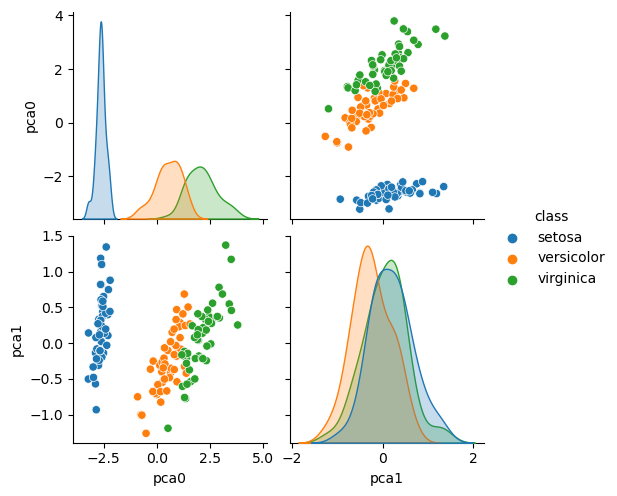

In [37]:
# Pair plot.
sns.pairplot(df_pca, hue='class')

If we look at this plot we can say that KNN will still have have a very difficut time seperating versicolor and verginica. So, it looks like reducing the variables by PCA has not yielded much.

In [38]:
# The scaled data.
df_X_trans

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [39]:
# Create a new PCA instance.
pca = dec.PCA(n_components=2)

# Fit the scaled data.
pca.fit(df_X_trans)

# Transform.
X_trans_pca = pca.transform(df_X_trans)

# Original classifications.
df_trans_pca = pd.DataFrame(df[['class']])

# Incorporate our PCA variables.
df_trans_pca['pca0'] = X_trans_pca[:, 0]
df_trans_pca['pca1'] = X_trans_pca[:, 1]

# Show.
df_trans_pca

,class,pca0,pca1
0,setosa,-2.264542,0.505704
1,setosa,-2.086426,-0.655405
2,setosa,-2.367950,-0.318477
3,setosa,-2.304197,-0.575368
4,setosa,-2.388777,0.674767
...,...,...,...
145,virginica,1.870522,0.382822
146,virginica,1.558492,-0.905314
147,virginica,1.520845,0.266795
148,virginica,1.376391,1.016362


In [40]:
# Look at the variance.
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

Explained variance ratios obtained from performing Principal Component Analysis (PCA) on the `df_X_trans` data is more balanced. It is about 75% to 25%, compared to 95% to 5% earlier.

C:\Users\JS\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


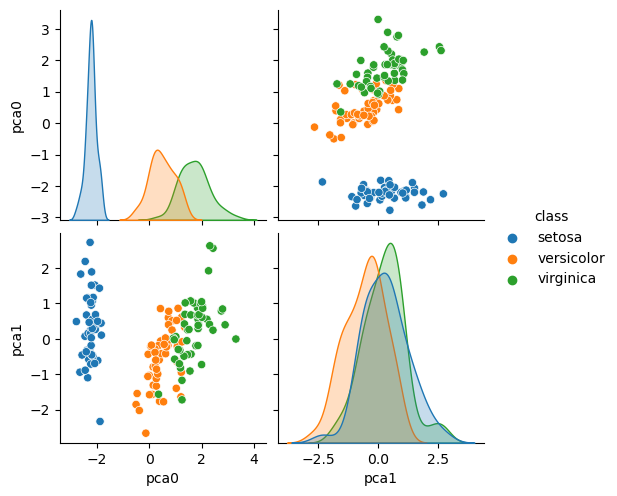

In [41]:
# Pair plot.
sns.pairplot(df_trans_pca, hue='class')

### Conclusions

After pre processing the data we get a good picture of how difficult it might be to classify the data. This last pair plot would suggest that after initial analysis it will be very difficult to get a clean seperation of versicolor and virginica by machine learning. We have succeeded in reducing the variables

### References

[501]<a id='ref501'></a> (wikipedia.org, Principal component analysis Dec 2023) Retreived from: https://en.wikipedia.org/wiki/Principal_component_analysis

[502]<a id='ref502'></a> (wikipedia, Shapiro–Wilk test, Dec 2023) retreived from: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

[503]<a id='ref503'></a> (scikit-learn.org, StandardScaler, Dec 2023) Retreived from: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

[504]<a id='ref504'></a> (statistics.laerd.com, Testing for Normality using SPSS Statistics, Dec 2023) retreived from: https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php



### END task5

[Back to top of notebook](#Task-5)